Importing libraries and Exploring the Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import metrics
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore') 

Definining Exploratory Data Analysis with an overview of the whole project 

In [2]:
data=pd.read_csv('water_potability.csv')

In [3]:
data.shape

(3276, 10)

In [4]:
#check columns with nulls
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
#percentage of nulls in each column
data.isnull().sum()*100/data.shape[0] 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [6]:
#filling nulls with median
data['ph']=data['ph'].fillna(data['ph'].median())
data['Sulfate']=data['Sulfate'].fillna(data['Sulfate'].median())
data['Trihalomethanes']=data['Trihalomethanes'].fillna(data['Trihalomethanes'].median())
data.isna().sum()
#data.shape

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
#printing information about data
data.info

<bound method DataFrame.info of             ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.036752  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  333.073546   
2     8.099124  224.236259  19909.541732     9.275884  333.073546   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  333.073546   
3273  9.419510  175.762646  33155.578218     7.350233  333.073546   
3274  5.126763  230.603758  11983.869376     6.303357  333.073546   
3275  7.874671  195.102299  17404.177061     7.509306  333.073546   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135

In [8]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,7.036752,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


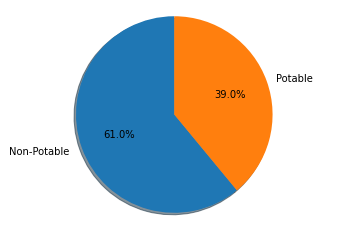

In [9]:
#pie chart to represent potability of water (non potable for 0 and potable for 1)
def pie_chart(dataframe):
    
    labels = dataframe.index.values
    sizes = dataframe['Potability'].values
    labels = ['Non-Potable ', 'Potable ']

        
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

df_city_count = pd.DataFrame(data.Potability.value_counts())
pie_chart(df_city_count)

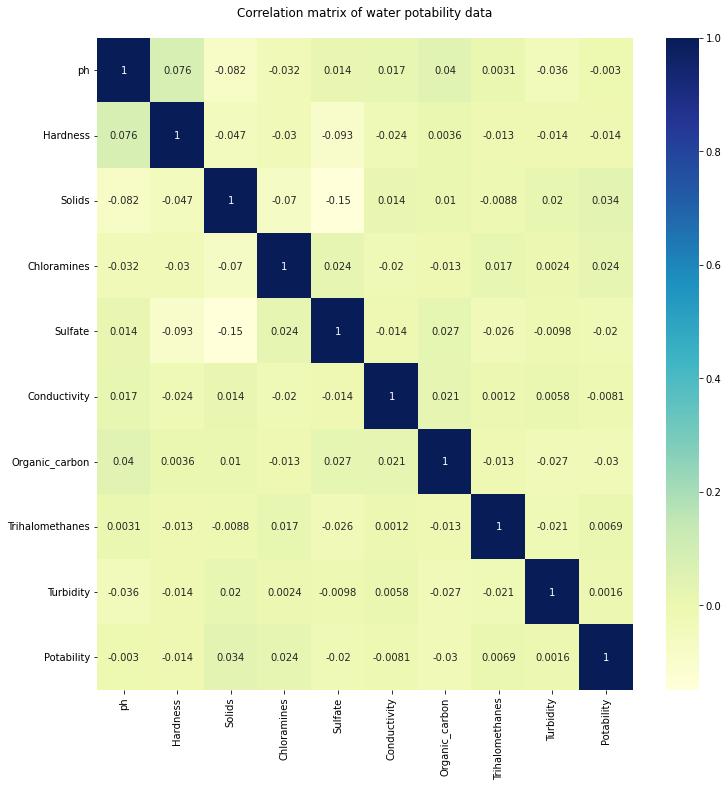

In [10]:
#representing correlation between features
plt.figure(figsize=(12,12))
hm = sns.heatmap(data.corr(), annot = True,cmap="YlGnBu")

hm.set(title = "Correlation matrix of water potability data\n")

plt.show()

In [11]:
#correlation between features 
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

#conclusion: from the graph , the feature with the highest coreleation with potability is Solids with correlation 0.033743
#and the lowest is organic_carbon with correlation -0.030001

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


In [12]:
#feature scalling to normalize data in range 0:1
stand=MinMaxScaler()
col=data.columns.tolist()
data[col]=stand.fit_transform(data[col])
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.502625,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.579704,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.579704,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0
5,0.398863,0.511010,0.466746,0.563043,0.561537,0.173092,0.237538,0.439550,0.209814,0.0
6,0.730276,0.727768,0.466763,0.560580,0.751819,0.178659,0.444050,0.680385,0.231233,0.0
7,0.616846,0.565593,0.219208,0.329629,0.495155,0.512581,0.389418,0.503483,0.558031,0.0
8,0.502625,0.259553,0.229281,0.583340,0.396690,0.363537,0.402531,0.431527,0.405562,0.0
9,0.798592,0.652175,0.413152,0.682990,0.781300,0.668699,0.602598,0.577945,0.552195,0.0


In [13]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [14]:
x.shape

(3276, 9)

In [15]:
y.shape

(3276,)

In [16]:
#splliting data to train and test with 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, shuffle=True, random_state=10)


In [17]:
#a list to save accuracy score for each model
scores=[]

Create a model that fits the data

random forest accuracy: 0.6642246642246642
random forest precision  0.6012269938650306
random forest recall  0.3181818181818182




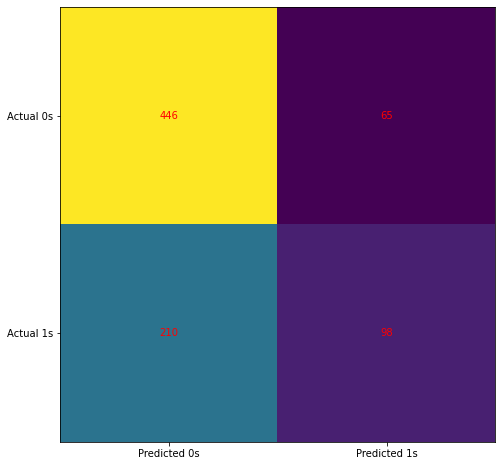

In [18]:
#random forest
classifier = RandomForestClassifier(n_estimators = 100)
#train the model
classifier.fit(X_train, y_train)
#predict with the test data
y_pred = classifier.predict(X_test)

print("random forest accuracy:",accuracy_score(y_test,y_pred))
print("random forest precision ",metrics.precision_score(y_test,y_pred))
print("random forest recall ",metrics.recall_score(y_test,y_pred))
print("\n")
#adding accuracy for the model in scores list
scores.append({
        'model': 'Random forest',
        'accuracy':accuracy_score(y_test,y_pred) })
#confusion matrix 
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
        
plt.show()
#note: Random forrest gives highest accuracy

#Random forest,consists of a large number of individual decision trees that operate as an ensemble.
#Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

In [19]:
#desicion tree 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("desicion tree accuracy:",accuracy_score(y_test,predictions))
print("desicion tree precision: ",metrics.precision_score(y_test,predictions))
print("desicion tree recall: ",metrics.recall_score(y_test,predictions))
print("\n")
scores.append({
        'model': 'Decision tree',
        'accuracy':accuracy_score(y_test,predictions) })

#In Decision Trees, for predicting a class label for a record we start from the root of the tree.
# We compare the values of the root attribute with the record’s attribute. 
#On the basis of comparison, we follow the branch corresponding to that value and jump to the next node

desicion tree accuracy: 0.5763125763125763
desicion tree precision:  0.4417910447761194
desicion tree recall:  0.4805194805194805




In [20]:
#logistic regression
log=LogisticRegression()
pred=log.fit(X_train,y_train).predict(X_test)

print("logistic regression accuracy: ",accuracy_score(y_test,pred))
scores.append({
        'model': 'logistic regression',
        'accuracy':accuracy_score(y_test,pred) })
#Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one
# or more nominal, ordinal, interval or ratio-level independent variables

logistic regression accuracy:  0.6251526251526252


In [21]:
#SVM
#we use grid search to choose the best parameters 
param_grid = {'C': [0.1, 1, 10, 100, 1000],
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                  'kernel': ['rbf']}
grid_SVM = GridSearchCV(SVC(), param_grid)
grid_SVM.fit(X_train, y_train)
pred=grid_SVM.predict(X_test)
print("SVM accuracy: ", accuracy_score(y_test, pred))
print("best parameters: ",grid_SVM.best_params_)
scores.append({
        'model': 'SVM',
        'accuracy':accuracy_score(y_test,pred) })
# SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with 
#the margins between the two as far apart as possible

SVM accuracy:  0.6642246642246642
best parameters:  {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


Creating an accurecy table

In [22]:
#printing accuracy for each model 
df_score = pd.DataFrame(scores,columns=['model','accuracy'])
df_score


,model,accuracy
0,Random forest,0.664225
1,Decision tree,0.576313
2,logistic regression,0.625153
3,SVM,0.664225


(0.0, 1.0)

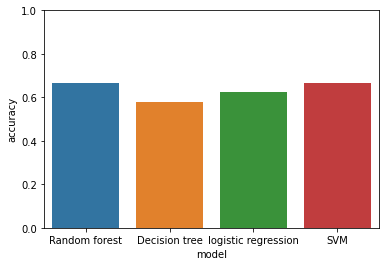

In [23]:
#visualization for each model's accuracy
sns.barplot(x="model", y="accuracy", data=df_score)
plt.ylim(0, 1)
#conclusion: Random forrest is the highest accuracy and decision tree is the lowest

In [24]:
#classification report 
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.68      0.87      0.76       511
         1.0       0.60      0.32      0.42       308

    accuracy                           0.66       819
   macro avg       0.64      0.60      0.59       819
weighted avg       0.65      0.66      0.63       819

